# Entangling qubits with a CNOT gate

Many quantum algorithms leverage a property of quantum mechanics that Einstein called "spooky actions at a distance" know as quantum entanglement. In quantum computing , entanglement requires the use of quantum gates that operate on more than one qubit at a time. One such gate is CNOT, which we'll use in conjunction with a hadamard gate to maximally entangle two qubits.


In [20]:
import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

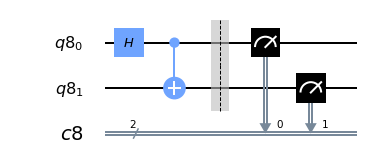

In [39]:
# Create a Quantum Register with 2 qubits
qr = QuantumRegister(2)

# Create a Classical Register with 2 bits
cr = ClassicalRegister(2)

#Create a QuantumCircuit from the quantum and classical registers

circ = QuantumCircuit(qr,cr)

#Place a Hadamard gate on the the top wire, putthing this qubit in a superpostion
circ.h(qr[0])

# Add a CX Cnot gate across the top two wires, entangling the qubits

circ.cx(qr[0], qr[1])
#Create a barrier that separates the gates from the measurements
circ.barrier(qr)

circ.measure(qr,cr)
circ.draw(output='mpl')


Now that the qunatum circuit has been defined and drawn, we'll execute it on a state vector simulator and examine the quantum state, which is one of the four Bell states

In [40]:
from qiskit import BasicAer
backend_sv_sim = BasicAer.get_backend('statevector_simulator')

#Execute the circuit on the state vector simulator
job_sim = execute(circ, backend_sv_sim, shots =1000)

#Grab the results
result_sim = job_sim.result()

#Obtain the state vector for the quantum circuit

quantum_state = result_sim.get_statevector(circ, decimals=3)
counts = result_sim.get_counts(circ)
quantum_state

array([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j])

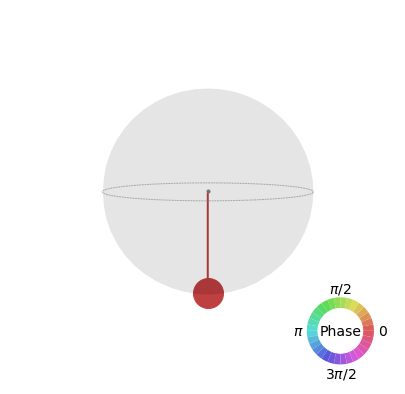

In [41]:
from qiskit.tools.visualization import plot_state_qsphere
plot_state_qsphere(quantum_state)

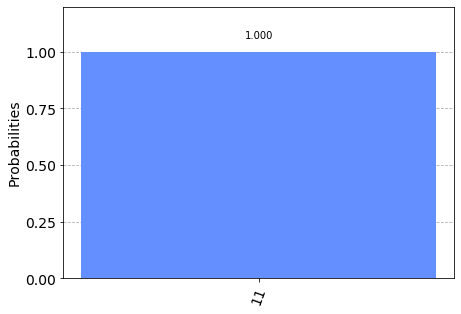

In [42]:
# Plot the results on a histogram
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)